In [1]:
# !pip install scipy
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
path_to_file = "../data/goodreads_library_export.csv"
df = pd.read_csv(path_to_file)
df

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies
0,232908573,Запах смерті,Simon Beckett,"Beckett, Simon",Євгенія Канчура,"=""6171513822""","=""9786171513822""",4,4.18,КСД,...,2025/06/23,2025/06/23,NaN,NaN,read,NaN,NaN,NaN,1,0
1,123221824,Шлях королів (Хроніки Буресвітла #1),Brandon Sanderson,"Sanderson, Brandon","Брендон Сандерсон, Андрій Зорницький","=""6171299413""","=""9786171299412""",5,4.67,Клуб Сімейного Дозвілля,...,2025/06/20,2025/06/20,NaN,NaN,read,NaN,NaN,NaN,1,0
2,59031092,"Війна старого (Війна старого, #1)",John Scalzi,"Scalzi, John","Джон Скалці, Олексій Антомонов","=""9661062714""","=""9789661062718""",4,4.23,Навчальна книга – Богдан,...,2025/05/20,2025/05/20,NaN,NaN,read,NaN,NaN,NaN,1,0
3,199331026,"Темніший колір магії (Shades of Magic, #1)",V.E. Schwab,"Schwab, V.E.","Єлізавета Долгозвяг, Ольга Левченко","=""6177914764""","=""9786177914760""",3,4.04,Nebo Booklab Publishing,...,2025/05/15,2025/05/15,NaN,NaN,read,NaN,NaN,NaN,1,0
4,217986936,Чорний телефон,Joe Hill,"Hill, Joe","Джо Гілл, Євген Гірін","=""6171704962""","=""9786171704961""",3,3.71,Vivat,...,2025/05/06,2025/05/05,NaN,NaN,read,В 2019 році читав цю книгу під іншою назвою - ...,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2197227,"Cemetery Dance (Pendergast, #9)",Douglas Preston,"Preston, Douglas",Lincoln Child,"=""0446580295""","=""9780446580298""",4,4.04,Grand Central Publishing,...,NaN,2018/01/03,NaN,NaN,read,NaN,NaN,NaN,1,0
326,39028,"The Wheel of Darkness (Pendergast, #8)",Douglas Preston,"Preston, Douglas",Lincoln Child,"=""0446580287""","=""9780446580281""",4,3.97,Warner Books,...,NaN,2018/01/03,NaN,NaN,read,NaN,NaN,NaN,1,0
327,7670,"The Andromeda Strain (Andromeda, #1)",Michael Crichton,"Crichton, Michael",NaN,"=""0060541814""","=""9780060541811""",4,3.91,Avon,...,NaN,2017/07/02,NaN,NaN,read,NaN,NaN,NaN,1,0
328,31287693,Dragon Teeth,Michael Crichton,"Crichton, Michael",NaN,"=""0008173060""","=""9780008173067""",0,3.86,HarperCollins Publishers,...,NaN,2017/07/02,to-read,to-read (#1),to-read,NaN,NaN,NaN,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book Id                     330 non-null    int64  
 1   Title                       330 non-null    object 
 2   Author                      330 non-null    object 
 3   Author l-f                  330 non-null    object 
 4   Additional Authors          255 non-null    object 
 5   ISBN                        330 non-null    object 
 6   ISBN13                      330 non-null    object 
 7   My Rating                   330 non-null    int64  
 8   Average Rating              330 non-null    float64
 9   Publisher                   325 non-null    object 
 10  Binding                     330 non-null    object 
 11  Number of Pages             330 non-null    int64  
 12  Year Published              328 non-null    float64
 13  Original Publication Year   303 non

In [6]:
df['Date Read'] = pd.to_datetime(df['Date Read'])
df['year_read'] = df['Date Read'].dt.year
df['month_read'] = df['Date Read'].dt.month
df['finished_week_day'] = df['Date Read'].dt.dayofweek
df['finished_week_day_name'] = df['Date Read'].dt.day_name()

In [7]:
df_read = df[df['Exclusive Shelf'] == 'read']
df_read.loc[:, 'Date Read'] = df_read.loc[:, 'Date Read'].fillna(df_read['Date Added'])
df_read

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies,year_read,month_read,finished_week_day,finished_week_day_name
0,232908573,Запах смерті,Simon Beckett,"Beckett, Simon",Євгенія Канчура,"=""6171513822""","=""9786171513822""",4,4.18,КСД,...,read,NaN,NaN,NaN,1,0,2025.0,6.0,0.0,Monday
1,123221824,Шлях королів (Хроніки Буресвітла #1),Brandon Sanderson,"Sanderson, Brandon","Брендон Сандерсон, Андрій Зорницький","=""6171299413""","=""9786171299412""",5,4.67,Клуб Сімейного Дозвілля,...,read,NaN,NaN,NaN,1,0,2025.0,6.0,4.0,Friday
2,59031092,"Війна старого (Війна старого, #1)",John Scalzi,"Scalzi, John","Джон Скалці, Олексій Антомонов","=""9661062714""","=""9789661062718""",4,4.23,Навчальна книга – Богдан,...,read,NaN,NaN,NaN,1,0,2025.0,5.0,1.0,Tuesday
3,199331026,"Темніший колір магії (Shades of Magic, #1)",V.E. Schwab,"Schwab, V.E.","Єлізавета Долгозвяг, Ольга Левченко","=""6177914764""","=""9786177914760""",3,4.04,Nebo Booklab Publishing,...,read,NaN,NaN,NaN,1,0,2025.0,5.0,3.0,Thursday
4,217986936,Чорний телефон,Joe Hill,"Hill, Joe","Джо Гілл, Євген Гірін","=""6171704962""","=""9786171704961""",3,3.71,Vivat,...,read,В 2019 році читав цю книгу під іншою назвою - ...,NaN,NaN,1,0,2025.0,5.0,1.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,7122034,"Fever Dream (Pendergast, #10)",Douglas Preston,"Preston, Douglas",Lincoln Child,"=""0446554960""","=""9780446554961""",4,4.13,Grand Central Publishing,...,read,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN
325,2197227,"Cemetery Dance (Pendergast, #9)",Douglas Preston,"Preston, Douglas",Lincoln Child,"=""0446580295""","=""9780446580298""",4,4.04,Grand Central Publishing,...,read,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN
326,39028,"The Wheel of Darkness (Pendergast, #8)",Douglas Preston,"Preston, Douglas",Lincoln Child,"=""0446580287""","=""9780446580281""",4,3.97,Warner Books,...,read,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN
327,7670,"The Andromeda Strain (Andromeda, #1)",Michael Crichton,"Crichton, Michael",NaN,"=""0060541814""","=""9780060541811""",4,3.91,Avon,...,read,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN


In [8]:
start_year = 2018

In [9]:
df_read = df_read[df_read['year_read'] >= start_year]
df_read

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies,year_read,month_read,finished_week_day,finished_week_day_name
0,232908573,Запах смерті,Simon Beckett,"Beckett, Simon",Євгенія Канчура,"=""6171513822""","=""9786171513822""",4,4.18,КСД,...,read,NaN,NaN,NaN,1,0,2025.0,6.0,0.0,Monday
1,123221824,Шлях королів (Хроніки Буресвітла #1),Brandon Sanderson,"Sanderson, Brandon","Брендон Сандерсон, Андрій Зорницький","=""6171299413""","=""9786171299412""",5,4.67,Клуб Сімейного Дозвілля,...,read,NaN,NaN,NaN,1,0,2025.0,6.0,4.0,Friday
2,59031092,"Війна старого (Війна старого, #1)",John Scalzi,"Scalzi, John","Джон Скалці, Олексій Антомонов","=""9661062714""","=""9789661062718""",4,4.23,Навчальна книга – Богдан,...,read,NaN,NaN,NaN,1,0,2025.0,5.0,1.0,Tuesday
3,199331026,"Темніший колір магії (Shades of Magic, #1)",V.E. Schwab,"Schwab, V.E.","Єлізавета Долгозвяг, Ольга Левченко","=""6177914764""","=""9786177914760""",3,4.04,Nebo Booklab Publishing,...,read,NaN,NaN,NaN,1,0,2025.0,5.0,3.0,Thursday
4,217986936,Чорний телефон,Joe Hill,"Hill, Joe","Джо Гілл, Євген Гірін","=""6171704962""","=""9786171704961""",3,3.71,Vivat,...,read,В 2019 році читав цю книгу під іншою назвою - ...,NaN,NaN,1,0,2025.0,5.0,1.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,23398840,"Broken Promise (Promise Falls, #1)",Linwood Barclay,"Barclay, Linwood",NaN,"=""0451472675""","=""9780451472670""",5,3.97,Berkley,...,read,"Довго вагався між оцінками 4 та 5, але оскільк...",NaN,NaN,1,0,2018.0,8.0,5.0,Saturday
311,34517346,"City of Endless Night (Pendergast, #17)",Douglas Preston,"Preston, Douglas",Lincoln Child,"=""""","=""""",4,4.08,Grand Central Publishing,...,read,17 книга серії. <br/>Це найтриваліша серія кни...,NaN,NaN,1,0,2018.0,8.0,1.0,Tuesday
312,38891545,Франческа. Повелителька траєкторій,Dorje Batuu,"Batuu, Dorje","Дорж Бату, Олександр Ком’яхов","=""6176794854""","=""9786176794851""",5,4.38,Видавництво Старого Лева,...,read,NaN,NaN,NaN,1,0,2018.0,8.0,6.0,Sunday
313,37787232,Аляска,Сергій Бут,"Бут, Сергій",NaN,"=""6171242993""","=""9786171242999""",4,3.45,Книжковий Клуб «Клуб Сімейного Дозвілля»,...,read,NaN,NaN,NaN,1,0,2018.0,7.0,6.0,Sunday


In [10]:
df_read.isnull().sum()

Book Id                         0
Title                           0
Author                          0
Author l-f                      0
Additional Authors             55
ISBN                            0
ISBN13                          0
My Rating                       0
Average Rating                  0
Publisher                       3
Binding                         0
Number of Pages                 0
Year Published                  1
Original Publication Year      19
Date Read                       0
Date Added                      0
Bookshelves                   230
Bookshelves with positions    230
Exclusive Shelf                 0
My Review                     187
Spoiler                       230
Private Notes                 230
Read Count                      0
Owned Copies                    0
year_read                       0
month_read                      0
finished_week_day               0
finished_week_day_name          0
dtype: int64

<Axes: xlabel='year_read'>

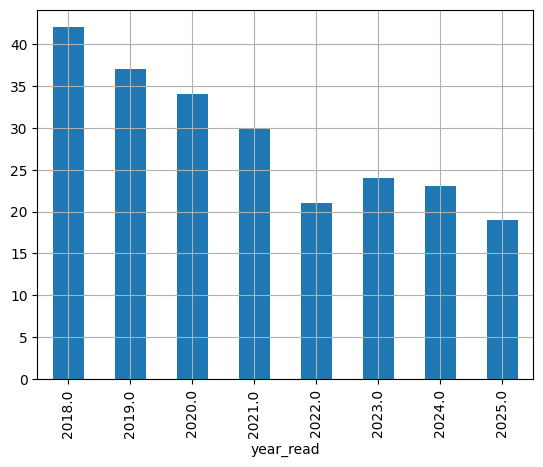

In [11]:
df_read['year_read'].value_counts().sort_index().plot(kind='bar', grid=True)

<Axes: xlabel='month_read'>

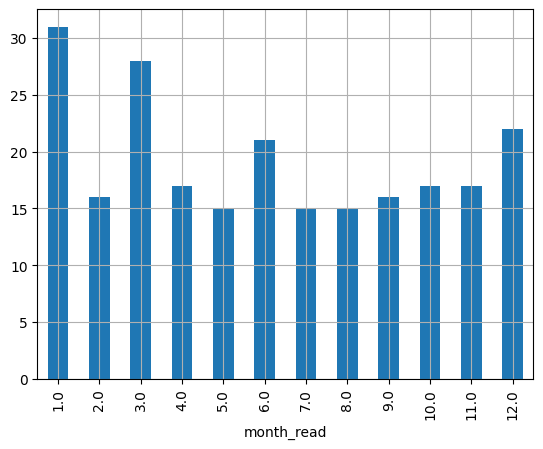

In [12]:
df_read['month_read'].value_counts().sort_index().plot(kind='bar', grid=True)

<Axes: xlabel='finished_week_day'>

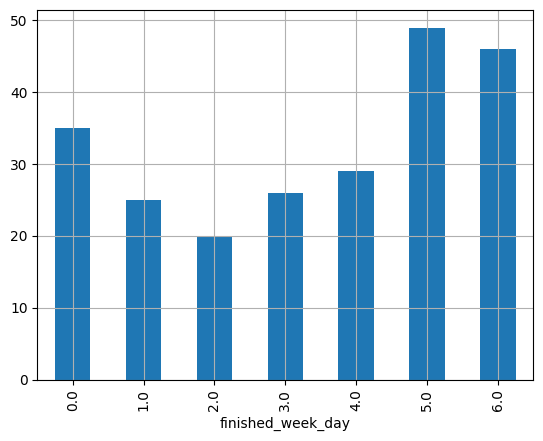

In [13]:
df_read['finished_week_day'].value_counts().sort_index().plot(kind='bar', grid=True)

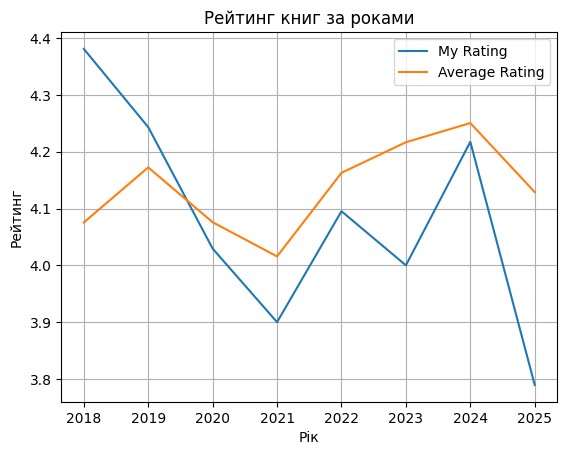

In [14]:
df_read.groupby('year_read')['My Rating'].mean().plot(kind='line', grid=True, label='My Rating')
df_read.groupby('year_read')['Average Rating'].mean().plot(kind='line', grid=True, label='Average Rating')
plt.title('Рейтинг книг за роками')
plt.xlabel('Рік')
plt.ylabel('Рейтинг')
plt.legend()
plt.show()

<Axes: xlabel='year_read'>

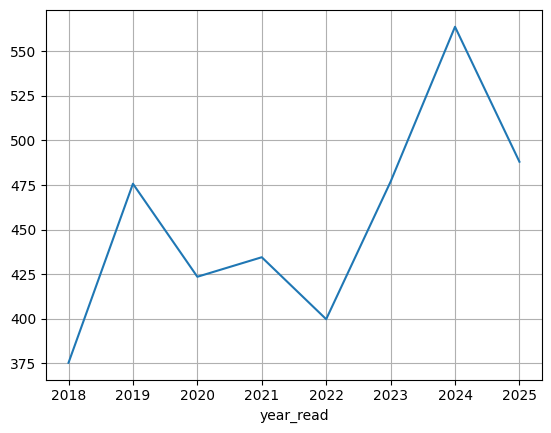

In [15]:
df_read.groupby('year_read')['Number of Pages'].mean().plot(kind='line', grid=True)

In [16]:
# def book_volume(pages):
    # if pages <= 200:
    #     return 1
    # elif pages <= 400:
    #     return 2
    # elif pages <= 600:
    #     return 3
    # elif pages <= 800:
    #     return 4
    # else:
    #     return 5

def book_volume(pages):
    if pages <= 200:
        return 1
    elif pages <= 300:
        return 2
    elif pages <= 400:
        return 3
    elif pages <= 500:
        return 4
    elif pages <= 600:
        return 5
    elif pages <= 700:
        return 6
    else:
        return 7

In [17]:
df_read.loc[:, 'book_volume'] = df_read['Number of Pages'].apply(lambda x: book_volume(x))

/var/folders/g1/bsggbnp51psgmjnkrkpvgkx80000gn/T/ipykernel_14526/2286763209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read.loc[:, 'book_volume'] = df_read['Number of Pages'].apply(lambda x: book_volume(x))


<Axes: xlabel='book_volume'>

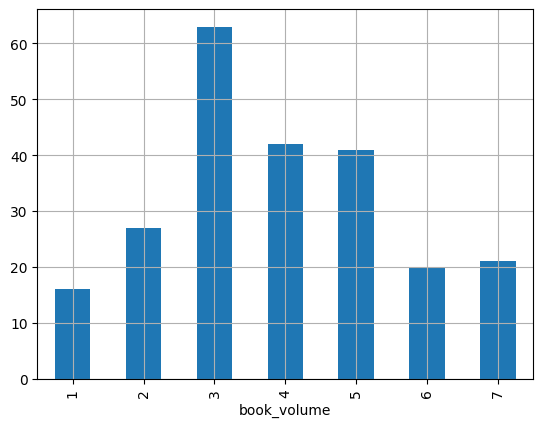

In [18]:
df_read['book_volume'].value_counts().sort_index().plot(kind='bar', grid=True)

/var/folders/g1/bsggbnp51psgmjnkrkpvgkx80000gn/T/ipykernel_14526/2842264185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='book_volume', ylabel='Average Rating'>

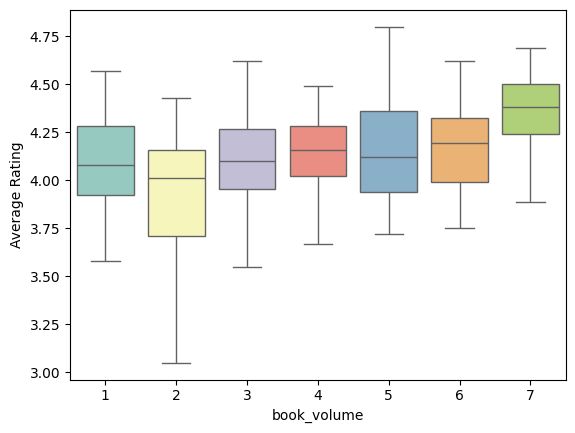

In [25]:
sns.boxplot(
    x='book_volume', 
    y='Average Rating', 
    data=df_read, 
    showfliers=False,
    palette='Set3'
    )

<Axes: xlabel='My Rating'>

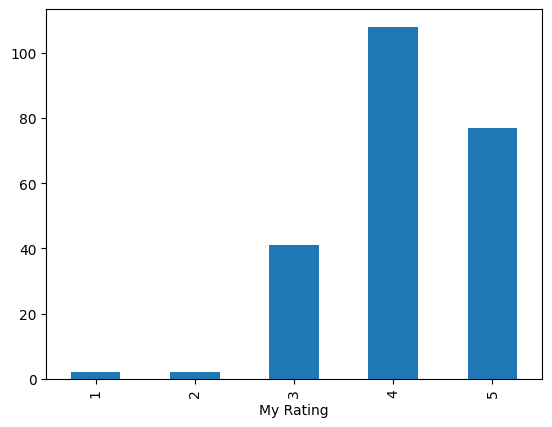

In [20]:
df_read['My Rating'].value_counts().sort_index().plot(kind='bar')

=== Топ-10 найпопулярніших авторів ===

Кількість прочитаних книг за автором:
Author
Stephen        King    12
Joe Abercrombie         8
Fredrik Backman         7
Simon Beckett           6
J.K. Rowling            6
Brandon Sanderson       6
Douglas Preston         6
Max Kidruk              6
Robert M. Wegner        5
Jonathan Stroud         5


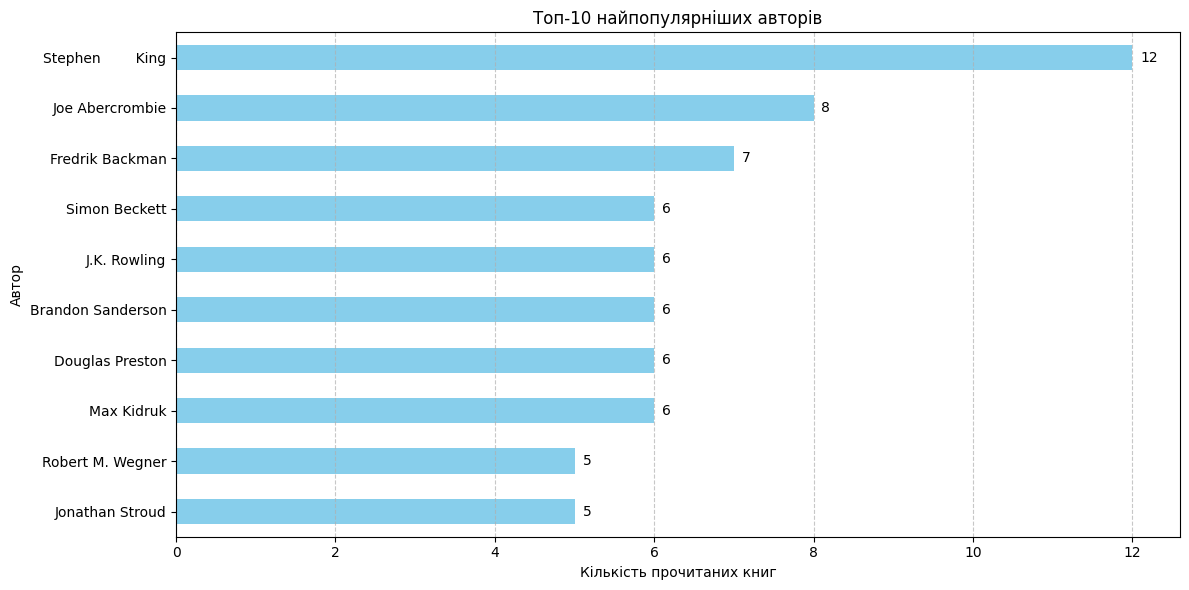


Додаткова інформація про авторів:

Stephen        King:
  - Мій середній рейтинг: 4.42
  - Середній рейтинг читача: 4.11
  - Перша прочитана книга: 2018-06-14 00:00:00
  - Остання прочитана книга: 2024-11-11 00:00:00
  - Всього книг: 12
  Деякі книги:
    - Голлі (4★)
    - Біллі Саммерс (4★)
    - Необхідні речі (4★)
    ...

Joe Abercrombie:
  - Мій середній рейтинг: 4.62
  - Середній рейтинг читача: 4.21
  - Перша прочитана книга: 2020-04-01 00:00:00
  - Остання прочитана книга: 2025-04-27 00:00:00
  - Всього книг: 8
  Деякі книги:
    - Герої (4★)
    - Пів війни (Shattered Sea, #3) (4★)
    - Пів короля (5★)
    ...

Fredrik Backman:
  - Мій середній рейтинг: 4.57
  - Середній рейтинг читача: 4.26
  - Перша прочитана книга: 2020-10-26 00:00:00
  - Остання прочитана книга: 2023-07-09 00:00:00
  - Всього книг: 7
  Деякі книги:
    - Моя бабуся просить їй вибачити (5★)
    - Переможці (Beartown, #3) (5★)
    - Ведмеже місто (Beartown, #1) (4★)
    ...

Simon Beckett:
  - Мій середні

In [21]:
# Аналіз найпопулярніших авторів
print("=== Топ-10 найпопулярніших авторів ===")

# Отримуємо топ-10 авторів за кількістю прочитаних книг
top_authors = df_read['Author'].value_counts().head(10)

# Виводимо таблицею
print("\nКількість прочитаних книг за автором:")
print(top_authors.to_string())

# Візуалізація
plt.figure(figsize=(12, 6))
top_authors.plot(kind='barh', color='skyblue')
plt.title('Топ-10 найпопулярніших авторів')
plt.xlabel('Кількість прочитаних книг')
plt.ylabel('Автор')
plt.gca().invert_yaxis()  # Щоб автор з найбільшою кількістю книг був зверху
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Додаємо кількість книг на стовпчики
for i, v in enumerate(top_authors):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

# Додаткова інформація про авторів
print("\nДодаткова інформація про авторів:")
for author in top_authors.index:
    author_books = df_read[df_read['Author'] == author][['Title', 'My Rating', 'Average Rating', 'Date Read']]
    my_avg_rating = author_books['My Rating'].mean()
    reader_avg_rating = author_books['Average Rating'].mean()
    first_read = author_books['Date Read'].min()
    last_read = author_books['Date Read'].max()
    print(f"\n{author}:")
    print(f"  - Мій середній рейтинг: {my_avg_rating:.2f}")
    print(f"  - Середній рейтинг читача: {reader_avg_rating:.2f}")
    print(f"  - Перша прочитана книга: {first_read}")
    print(f"  - Остання прочитана книга: {last_read}")
    print(f"  - Всього книг: {len(author_books)}")
    print("  Деякі книги:")
    for _, book in author_books[['Title', 'My Rating']].head(3).iterrows():
        print(f"    - {book['Title']} ({book['My Rating']}★)")
    if len(author_books) > 3:
        print("    ...")

In [22]:
my_ratings = df_read['My Rating'].values
avg_ratings = df_read['Average Rating'].values

delta = my_ratings - avg_ratings
mean_delta = np.mean(delta)
print(f"Середня різниця: {mean_delta:.4f}")

Середня різниця: -0.0149


In [23]:
rmse = np.sqrt(np.mean((my_ratings - avg_ratings)**2))

print(f"Ваш RMSE: {rmse:.2f}")

Ваш RMSE: 0.68


In [24]:
from scipy.stats import pearsonr

corr, _ = pearsonr(my_ratings, avg_ratings)
print(f"Кореляція Пірсона: {corr:.2f}")

Кореляція Пірсона: 0.52
